# Build ML model with cross-validation

* Cross-validation
* Logistic regression or Linear SVM model

In [4]:
#! pip install imblearn

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key:
experiment = Experiment(
    api_key="csHgcCHtNQ4Jpx86Nr58xilWl",
    project_name="brain-trauma",
    workspace="jwilliamn",
)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jwilliamn/brain-trauma/1ec25406a95c44cfa245b11fea7d16b7



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
    
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import sensitivity_score, specificity_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('ml_data/featuresML.csv')

In [4]:
data

,coh_nofilt_fp2_f8,coh_nofilt_f7_f3,coh_nofilt_f7_t3,coh_nofilt_f7_t5,coh_nofilt_t3_c3,coh_nofilt_t3_t4,coh_nofilt_t3_t5,coh_nofilt_t3_t6,coh_nofilt_c4_p3,coh_nofilt_t5_t6,...,bands_gamma_p3,bands_alpha_t6,bands_beta_t6,bands_alpha_o1,bands_gamma_o1,bands_beta_o2,psi_alpha_c4_fz,psi_alpha_pz_p3,fn,target
0,0.898959,0.708213,0.745451,0.551259,0.581465,0.754051,0.688510,0.588942,0.374822,0.764996,...,0.574888,24.443810,14.672073,22.853672,0.787576,11.553152,-0.453495,-0.040627,b906373005ba09e6.csv,1
1,0.821351,0.837714,0.801349,0.805891,0.744514,0.650385,0.783752,0.642973,0.652106,0.749840,...,0.045172,55.977540,28.794784,85.863173,0.167025,31.411912,-1.310173,-3.639103,bc8568311c86157d.csv,1
2,0.627041,0.552460,0.749100,0.596588,0.505669,0.551182,0.686000,0.591421,0.389563,0.583709,...,7.246699,39.635000,11.160918,51.235402,19.754951,20.405893,-0.292522,0.585621,5c9ca89c610ef553.csv,1
3,0.901875,0.950780,0.943904,0.798676,0.865162,0.824546,0.863728,0.676856,0.366865,0.726732,...,0.107074,113.937982,22.749786,79.578831,0.116438,23.191103,2.041392,0.666601,2a4a9f39f461ddbd.csv,1
4,0.669300,0.574855,0.609371,0.429392,0.503848,0.424970,0.513524,0.449774,0.436716,0.670137,...,0.131500,21.527182,7.231482,14.783130,0.481252,6.826721,0.909651,0.368169,a4c28a88c78ef3f5.csv,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.808646,0.986471,0.764094,0.556343,0.672812,0.828388,0.819582,0.789529,0.587434,0.892181,...,0.372073,68.217877,15.747577,107.894848,0.758138,17.706730,-1.541190,-0.041241,d668db5269381df8.csv,0
181,0.747423,0.857544,0.874634,0.591820,0.881394,0.751821,0.811235,0.551895,0.610649,0.742634,...,0.883916,4.777362,8.292166,14.857729,1.253049,9.081738,-0.093786,-0.065965,f85f937f89136a05.csv,0
182,0.629094,0.695265,0.652384,0.565711,0.668599,0.630385,0.725036,0.677443,0.474455,0.870580,...,0.387391,25.329833,6.417887,25.829750,0.722493,6.207193,1.737656,1.205893,3ed5ff2942862803.csv,0
183,0.777284,0.621506,0.761178,0.402753,0.611266,0.437993,0.673949,0.388979,0.386523,0.478244,...,1.971604,407.507288,26.820247,233.941636,0.756009,13.533132,-0.735945,0.677076,d9ae063bfbaa9569.csv,0


In [5]:
X = data.drop(['fn','target'], axis=1)
y = data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, stratify=y)

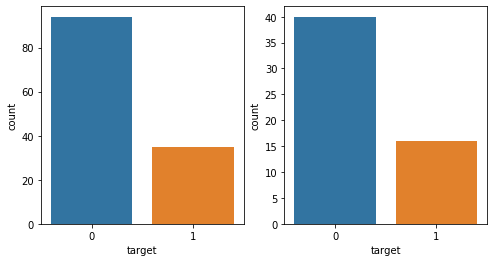

In [7]:
fig, axs = plt.subplots(1,2, figsize=[8,4])
sns.countplot(y_train, ax=axs[0])
sns.countplot(y_test, ax=axs[1])

In [8]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_sc = scaler.fit_transform(X)

In [9]:
experiment.set_name("RandomForest 10 cross validated")

In [10]:
grid={'n_estimators':[10, 100, 300, 500], 'max_features': ['auto', 'sqrt', 'log2'],"class_weight":['none','balanced']}

rdf=RandomForestClassifier()

rdf_cv=GridSearchCV(rdf,grid,cv=10, n_jobs=-1)
rdf_cv.fit(X_train_sc,y_train)

print("tuned hpyerparameters :(best parameters) ",rdf_cv.best_params_)
print("accuracy :",rdf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_features': 'sqrt', 'n_estimators': 100}
accuracy : 0.9301282051282052


In [11]:
for i in range(len(rdf_cv.cv_results_['params'])):
    for k,v in rdf_cv.cv_results_.items():
        if k == "params":
            experiment.log_parameters(v[i])
        else:
            experiment.log_metric(k,v[i])

In [ ]:
# grid={'n_estimators':[10, 100, 300, 500], 'max_features': ['auto', 'sqrt', 'log2'],"class_weight":['none','balanced']}

# rdf=RandomForestClassifier()

# rdf_cv=GridSearchCV(rdf,grid,cv=10, n_jobs=-1)
# rdf_cv.fit(X_train_sc,y_train)

# print("tuned hpyerparameters :(best parameters) ",rdf_cv.best_params_)
# print("accuracy :",rdf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_features': 'log2', 'n_estimators': 100}
accuracy : 0.8455128205128204


In [19]:
experiment.set_name("RandomForest for best params")

In [15]:
rdf = RandomForestClassifier(max_features='log2', n_estimators=100, class_weight='balanced')
rdf.fit(X_train_sc, y_train)

y_pred_trainp = cross_val_predict(rdf, X_train_sc, y_train, method='predict_proba', cv=10)[:,1] 
y_predp = cross_val_predict(rdf, X_test_sc, y_test, method='predict_proba', cv=10)[:,1] 
y_allp = cross_val_predict(rdf, X_sc, y, method='predict_proba', cv=10)[:,1]
roc_train = roc_auc_score(y_train, y_pred_trainp)
roc_test = roc_auc_score(y_test, y_predp)
roc_all = roc_auc_score(y, y_allp)
print('ROC_AUC score train: ', roc_train)
print('ROC_AUC score test: ', roc_train)

y_pred_train = cross_val_predict(rdf, X_train_sc, y_train, method='predict', cv=10)
y_pred = cross_val_predict(rdf, X_test_sc, y_test, method='predict', cv=10)
sen_train = sensitivity_score(y_train, y_pred_train)
sen_test = sensitivity_score(y_test, y_pred)
spe_train = specificity_score(y_train, y_pred_train)
spe_test = specificity_score(y_test, y_pred)
print('Sensitivity for train: ', sen_train)
print('Sensitivity for test: ', sen_test)
print('Specificity for train: ', spe_train)
print('Specificity for test: ', spe_test)

print('Confusion matrix for RFC')
confusion_matrix(y_test, y_pred) 

ROC_AUC score train:  0.9594101123595505
ROC_AUC score test:  0.9594101123595505
Sensitivity for train:  0.775
Sensitivity for test:  0.45454545454545453
Specificity for train:  0.9550561797752809
Specificity for test:  1.0
Confusion matrix for RFC


array([[45,  0],
       [ 6,  5]])

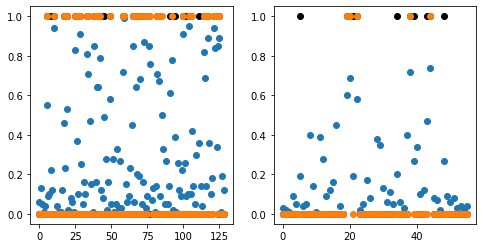

In [21]:
fig, axs = plt.subplots(1,2, figsize=[8,4])

axs[0].plot(y_train.values, 'ko')
axs[0].plot(y_pred_trainp, 'o')
axs[0].plot(y_pred_train, 'o')

axs[1].plot(y_test.values, 'ko')
axs[1].plot(y_predp, 'o')
axs[1].plot(y_pred, 'o')

In [ ]:
gnb = GaussianNB().fit(X_train_sc, y_train) 

y_pred_trainp = cross_val_predict(gnb, X_train_sc, y_train, method='predict_proba', cv=10)[:,1] 
y_predp = cross_val_predict(gnb, X_test_sc, y_test, method='predict_proba', cv=10)[:,1] 
y_allp = cross_val_predict(gnb, X_sc, y, method='predict_proba', cv=10)[:,1]
roc_train = roc_auc_score(y_train, y_pred_trainp)
roc_test = roc_auc_score(y_test, y_predp)
roc_all = roc_auc_score(y, y_allp)
print('ROC_AUC score train: ', roc_train)
print('ROC_AUC score test: ', roc_train)

y_pred_train = cross_val_predict(gnb, X_train_sc, y_train, method='predict', cv=10)
y_pred = cross_val_predict(gnb, X_test_sc, y_test, method='predict', cv=10)
sen_train = sensitivity_score(y_train, y_pred_train)
sen_test = sensitivity_score(y_test, y_pred)
spe_train = specificity_score(y_train, y_pred_train)
spe_test = specificity_score(y_test, y_pred)
print('Sensitivity for train: ', sen_train)
print('Sensitivity for test: ', sen_test)
print('Specificity for train: ', spe_train)
print('Specificity for test: ', spe_test) 

print('Confusion matrix for GNB')
confusion_matrix(y_test, y_pred)

ROC_AUC score train:  0.7710047003525264
ROC_AUC score test:  0.7710047003525264
Sensitivity for train:  0.7567567567567568
Sensitivity for test:  0.7857142857142857
Specificity for train:  0.6956521739130435
Specificity for test:  0.8571428571428571
Confusion matrix for GNB


array([[36,  6],
       [ 3, 11]])

In [24]:
experiment.set_name("LogisticRegression 10 cross validated")


In [26]:

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

clf=LogisticRegression()

clf_cv=GridSearchCV(clf,grid,cv=10, n_jobs=-1)
clf_cv.fit(X_train_sc,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9070512820512822


In [48]:
experiment.set_name("LogisticRegression 10 cross validated")

In [34]:
#y_train = y_train.to_numpy()

In [49]:
kf = KFold(n_splits=10)
curr_fold = 0
acc_list = []

for train_idx, test_idx in kf.split(X_train_sc):
    clf = LogisticRegression()
    
    clf.fit(X_train_sc[train_idx], y_train[train_idx])

    # Predict unseen test data based on fitted classifer
    predicted = clf.predict(X_train_sc[test_idx])

    # Compute accuracy
    acc = accuracy_score(y_train[test_idx].tolist(), predicted)
    acc_list.append(acc)
    experiment.log_metric("accuracy_fold_%s" % curr_fold, acc)

    curr_fold += 1

experiment.log_metric("average accuracy", np.average(acc_list))

In [39]:
acc

0.9166666666666666

In [40]:
from sklearn import svm

In [41]:
experiment.set_name("SVC 10 cross validated")

In [45]:
kf = KFold(n_splits=10)
curr_fold = 0
acc_list = []

for train_idx, test_idx in kf.split(X_train_sc):
    clf = svm.SVC()
    
    clf.fit(X_train_sc[train_idx], y_train[train_idx])

    # Predict unseen test data based on fitted classifer
    predicted = clf.predict(X_train_sc[test_idx])

    # Compute accuracy
    acc = accuracy_score(y_train[test_idx].tolist(), predicted)
    acc_list.append(acc)
    experiment.log_metric("accuracy_fold_%s" % curr_fold, acc)
    

    curr_fold += 1

experiment.log_metric("average accuracy", np.average(acc_list))

0.7692307692307693
0.7692307692307693
0.9230769230769231
0.8461538461538461
1.0
0.9230769230769231
0.8461538461538461
0.8461538461538461
1.0
0.9166666666666666
